#**IRIS FLOWER CLASSIFICATION**

#Import Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from PIL import Image
from io import BytesIO
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#Load The Dataset

In [ ]:
data=pd.read_csv(r'IRIS.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [ ]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
data.sepal_length.min()

4.3

In [ ]:
data.sepal_length.max()

7.9

In [ ]:
data.sepal_width.min()

2.0

In [ ]:
data.sepal_width.max()

4.4

In [ ]:
data.petal_length.min()

1.0

In [ ]:
data.petal_length.max()

6.9

In [ ]:
data.petal_width.min()

0.1

In [ ]:
data.petal_width.max()

2.5

In [ ]:
data.species.value_counts()

,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [ ]:
data.sepal_length.nunique()/data.shape[0]*100

23.333333333333332

In [ ]:
data.sepal_width.nunique()/data.shape[0]*100

15.333333333333332

In [ ]:
data.petal_width.nunique()/data.shape[0]*100

14.666666666666666

In [ ]:
data.species.value_counts(normalize=True)*100

,proportion
species,
Iris-setosa,33.333333
Iris-versicolor,33.333333
Iris-virginica,33.333333


#Generating Images For Flower Types

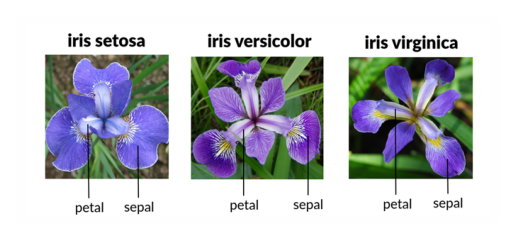

In [ ]:
url = "https://miro.medium.com/v2/resize:fit:700/1*uo6VfVH87jRjMZWVdwq3Vw.png"
response = requests.get(url)
image = Image.open(BytesIO(response.content))
plt.imshow(image)
plt.axis("off")
plt.show()

#Pie Chart Representation

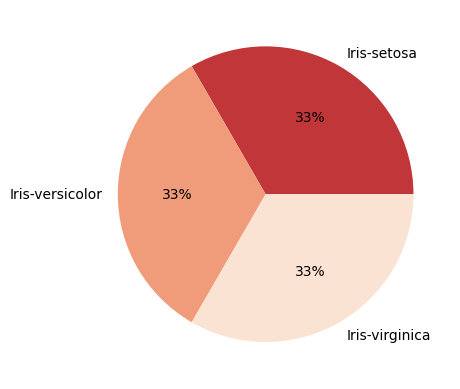

In [ ]:
color = sns.color_palette('RdBu')
plt.pie(data['species'].value_counts(), labels=data['species'].unique(), autopct='%1.f%%',colors=color);

In [ ]:
data.groupby('species')['sepal_length'].mean()

,sepal_length
species,
Iris-setosa,5.006
Iris-versicolor,5.936
Iris-virginica,6.588


#Bar Chart Representation

<Axes: xlabel='species'>

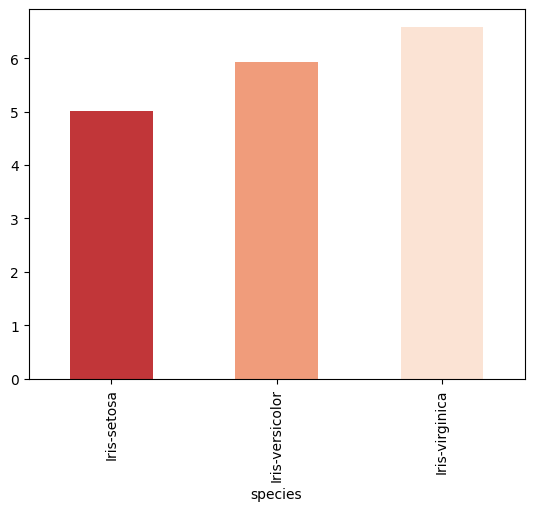

In [ ]:
color = sns.color_palette('RdBu')
data.groupby('species')['sepal_length'].mean().plot(kind='bar',color=color)

In [ ]:
data.groupby('species')['petal_length'].mean()

,petal_length
species,
Iris-setosa,1.464
Iris-versicolor,4.260
Iris-virginica,5.552


<Axes: xlabel='species'>

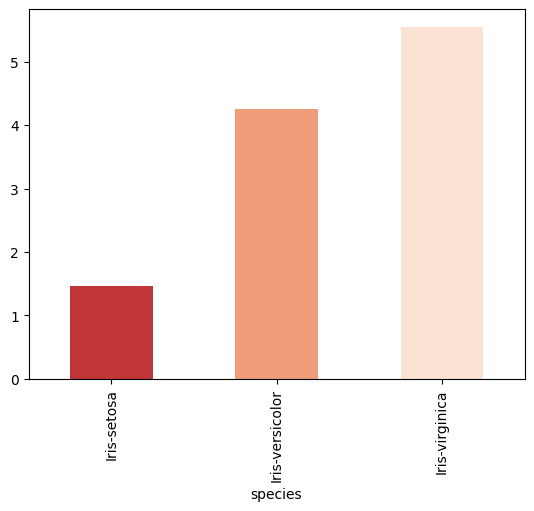

In [ ]:
color = sns.color_palette('RdBu')
data.groupby('species')['petal_length'].mean().plot(kind='bar',color=color)

In [ ]:
data.groupby('species')['petal_width'].mean()

,petal_width
species,
Iris-setosa,0.244
Iris-versicolor,1.326
Iris-virginica,2.026


<Axes: xlabel='species'>

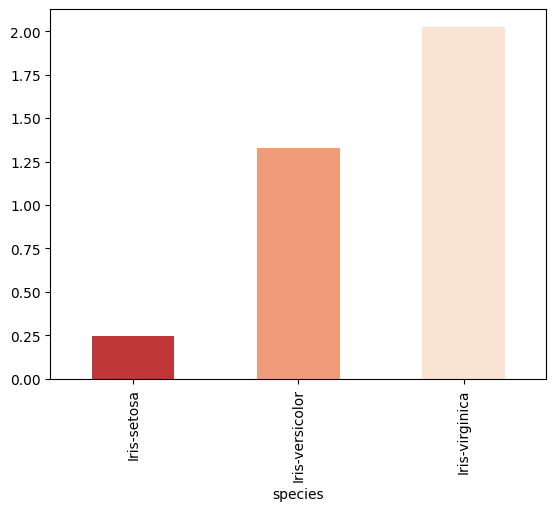

In [ ]:
color = sns.color_palette('RdBu')
data.groupby('species')['petal_width'].mean().plot(kind='bar',color=color)

In [ ]:
le =LabelEncoder()
data['species'] = le.fit_transform(data['species'])

In [ ]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
data.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
87,6.3,2.3,4.4,1.3,1
77,6.7,3.0,5.0,1.7,1
104,6.5,3.0,5.8,2.2,2
67,5.8,2.7,4.1,1.0,1
61,5.9,3.0,4.2,1.5,1
111,6.4,2.7,5.3,1.9,2
38,4.4,3.0,1.3,0.2,0
112,6.8,3.0,5.5,2.1,2
17,5.1,3.5,1.4,0.3,0
48,5.3,3.7,1.5,0.2,0


#Build The Model

In [ ]:
x=data.drop(columns='species',axis=1)
y=data.species

In [ ]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [ ]:
model_params={
    'linear_regression':{
        'model':LinearRegression(),
        'params':{
            'fit_intercept':[True,False],
            'positive':[True,False]
        }
    },
    'Logistic_Regression':{
        'model':LogisticRegression(),
        'params':{
                'penalty':['l1', 'l2'],
                'C':[0.01, 0.1, 1, 10],
                'solver':['saga'],
                'max_iter':[100, 200, 500],
                'multi_class':['multinomial']
            }
        },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[50,100,200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]

        }
    }


}

In [ ]:
score=[]
for model_name,mp in model_params.items():
    clf=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=True)
    clf.fit(x,y)
    score.append({
        'model': model_name,
        'train_score': clf.cv_results_['mean_train_score'][clf.best_index_],
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
df = pd.DataFrame(score,columns=['model','train_score','best_score','best_params'])
df

,model,train_score,best_score,best_params
0,linear_regression,0.926916,0.322883,"{'fit_intercept': True, 'positive': False}"
1,Logistic_Regression,0.981667,0.986667,"{'C': 1, 'max_iter': 100, 'multi_class': 'mult..."
2,random_forest,1.000000,0.966667,"{'max_depth': None, 'min_samples_split': 2, 'n..."


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

In [ ]:
model_lg=LogisticRegression(C=1,max_iter=100,multi_class='multinomial',solver='saga')

In [ ]:
model_lg.fit(x_train,y_train)

LogisticRegression(C=1, multi_class='multinomial', solver='saga')

In [ ]:
model_lg.score(x_train,y_train)

0.9833333333333333

In [ ]:
model_lg.score(x_test,y_test)

1.0

In [ ]:
print(y_test.value_counts(normalize=True))

species
0    0.333333
2    0.333333
1    0.333333
Name: proportion, dtype: float64


#**Summary**
This code performs a comprehensive analysis and modeling of the Iris dataset. It begins by loading the dataset and exploring its features through descriptive statistics, including value counts and unique value percentages.  Visualizations, such as a pie chart illustrating the distribution of species and bar charts comparing sepal and petal measurements across species, provide insights into the data.

The code then preprocesses the data by label encoding the 'species' column.  Crucially, it compares the performance of multiple classification models (Linear Regression, Logistic Regression, and Random Forest) using GridSearchCV for hyperparameter tuning.  The results, including training scores, best scores, and optimal parameters, are tabulated for comparison.  Finally, a Logistic Regression model is trained on the dataset, split into training and testing sets, and evaluated based on accuracy scores.  The class distribution in the test set is also presented.

#**Conclusion**
In conclusion, the code effectively demonstrates a machine learning workflow from data exploration to model selection and evaluation. The comparative analysis of multiple models using GridSearchCV helps identify the most suitable model for the Iris dataset.  The final Logistic Regression model achieves good performance, as indicated by its accuracy on the testing set.  The visualizations provide valuable context to the numerical data analysis.  Further improvements might include more advanced visualization techniques, more sophisticated feature engineering, and possibly exploring additional models.
